# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
import re

## Data Gathering


In [2]:
# Reading the provided file

twitter_archive = pd.read_csv('/Users/user/Downloads/twitter_archive_enhanced.csv')

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# Requesting tweet image predictions

with open('image_predictions.tsv' , 'wb') as f:
    image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
    f.write(image_predictions.content) 

In [12]:
# Reading image predictions

image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

In [13]:
#Reading JSON file as a dataframe

tweet_status = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [14]:
# Reading the json file line by line into pandas Dataframe

tweets= []
with open('tweet-json.txt','r') as f:
    for line in f:
        data = json.loads(line)
        tweets.append(data)
tweet_status= pd.DataFrame(tweets,columns=['id','retweet_count','favorite_count'])

## Assessing Data




### Visual Assessment

In [18]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [19]:
image_prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [21]:
tweet_status

id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

### Programmatic assessment

In [22]:
# statistical figures of the numerical values

twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [24]:
# confirming the structural characteristics of the data

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [25]:
# random records of the data frame

twitter_archive.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
174   858107933456039936                    NaN                  NaN   
1681  681981167097122816                    NaN                  NaN   
1493  692752401762250755                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
2154  669625907762618368                    NaN                  NaN   
1469  694183373896572928                    NaN                  NaN   
551   804475857670639616                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
74    878316110768087041                    NaN                  NaN   
478   815966073409433600                    NaN                  NaN   
1730  679854723806179328                    NaN                  NaN   
1882  674999807681908736           6.747934e+17         4.196984e+09   
662   790987426131050500                    NaN                  NaN   
375   828361771580813312                    NaN                  NaN   
545   805826884734976000                    NaN                  NaN   
414   822859134160621569                    NaN                  NaN   
1603  685943807276412928                    NaN                  NaN   
1910  674416750885273600                    NaN                  NaN   
481   815639385530101762                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   

                      timestamp  \
174   2017-04-28 23:57:28 +0000   
1681  2015-12-29 23:32:35 +0000   
1493  2016-01-28 16:53:37 +0000   
1165  2016-04-21 02:25:47 +0000   
2154  2015-11-25 21:17:12 +0000   
1469  2016-02-01 15:39:48 +0000   
551   2016-12-02 00:02:45 +0000   
2332  2015-11-16 20:01:42 +0000   
74    2017-06-23 18:17:33 +0000   
478   2017-01-02 17:00:46 +0000   
1730  2015-12-24 02:42:51 +0000   
1882  2015-12-10 17:11:09 +0000   
662   2016-10-25 18:44:32 +0000   
375   2017-02-05 21:56:51 +0000   
545   2016-12-05 17:31:15 +0000   
414   2017-01-21 17:31:20 +0000   
1603  2016-01-09 21:58:42 +0000   
1910  2015-12-09 02:34:18 +0000   
481   2017-01-01 19:22:38 +0000   
387   2017-02-01 01:11:25 +0000   

                                                 source  \
174   <a href="http://twitter.com/download/iphone" r...   
1681  <a href="http://twitter.com/download/iphone" r...   
1493  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
2154  <a href="http://twitter.com/download/iphone" r...   
1469  <a href="http://twitter.com/download/iphone" r...   
551   <a href="http://twitter.com/download/iphone" r...   
2332  <a href="http://twitter.com/download/iphone" r...   
74    <a href="http://twitter.com/download/iphone" r...   
478   <a href="http://twitter.com/download/iphone" r...   
1730  <a href="http://twitter.com/download/iphone" r...   
1882  <a href="http://twitter.com/download/iphone" r...   
662   <a href="http://twitter.com/download/iphone" r...   
375   <a href="http://twitter.com" rel="nofollow">Tw...   
545   <a href="http://twitter.com/download/iphone" r...   
414   <a href="http://twitter.com/download/iphone" r...   
1603  <a href="http://twitter.com/download/iphone" r...   
1910  <a href="http://twitter.com/download/iphone" r...   
481   <a href="http://twitter.com/download/iphone" r...   
387   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
174   This is Wyatt. He had an interview earlier tod...                  NaN   
1681  This is Jimothy. He's a Trinidad Poliwhirl. Fa...                  NaN   
1493  "Hello yes could I get one pupper to go please...                  NaN   
1165  Happy 4/20 from the squad! 13/10 for all https...                  NaN   
2154  This is Penny. She's having fun AND being safe...                  NaN   
1469  This is Lola. She realized mid hug that s

In [26]:
# Checking the structure of the dataframe

image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:

image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [28]:
# top 5 data

image_prediction.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [29]:
# Checking the statistical figures of the numerical values in the data frame

tweet_status.describe()

id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

In [30]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [31]:
#random 10 records

tweet_status.sample(10)

id  retweet_count  favorite_count
1182  718631497683582976           9126           20697
1369  702276748847800320            860            2706
1082  738402415918125056            955            3599
887   759793422261743616           2173            6620
2158  669567591774625800             61             248
1233  712668654853337088           1367            4531
1084  738166403467907072           3828            9635
788   773985732834758656           4492           11925
226   848324959059550208           4037           20229
2126  670303360680108032            151             452

In [32]:
image_prediction['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
bell_cote              1
oxcart                 1
chickadee              1
pool_table             1
common_newt            1
Name: p3, Length: 408, dtype: int64

# Quality issues

# twitter_archive table
* retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id,retweeted_status_id and in_reply_to_user_id columns contain missing values
* wrong representation of timestamp and data type
* the 'name' column contains wrong or incorrect names
* the source column contains similar url directory but differnet folder address.

# image_predictions table

* non dog-related names are present in the p1,p2  and p3 columns
 




In [33]:
tweet_status.head(10)

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048
5  891087950875897856           3261           20562
6  890971913173991426           2158           12041
7  890729181411237888          16716           56848
8  890609185150312448           4429           28226
9  890240255349198849           7711           32467

### Tidiness issues



#### tweet_status table
* tweet_id column is represented as id column

#### tweet_status predictions table
* p1,p2 and p3 columns have '_' forming compound names.



## Cleaning Data


In [111]:
# creating data copies

cleaned_archive = twitter_archive.copy()
cleaned_image = image_prediction.copy()
cleaned_status = tweet_status.copy()


In [112]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [113]:
cleaned_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [114]:
cleaned_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #1: 

#### Define
Drop in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, expanded_urls columns


In [120]:
#Removing records where retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp has a value

cleaned_archive = cleaned_archive[cleaned_archive.retweeted_status_id.isnull()]
cleaned_archive = cleaned_archive[cleaned_archive.retweeted_status_user_id.isnull()]
cleaned_archive = cleaned_archive[cleaned_archive.retweeted_status_timestamp.isnull()]

In [116]:
cleaned_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### Code

In [117]:
cleaned_archive = cleaned_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### Test

In [121]:
cleaned_archive.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [122]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #2:

#### Define
Create a new column to represent doggo, floofer, pupper and puppo columns

In [123]:
cleaned_archive.head(5)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### Code

In [124]:
#turning 4 columns into 1

cleaned_archive.loc[cleaned_archive['doggo'] == 'doggo', 'dog_class'] = 'doggo'
cleaned_archive.loc[cleaned_archive['floofer'] == 'floofer', 'dog_class'] = 'floofer'
cleaned_archive.loc[cleaned_archive['pupper'] == 'pupper', 'dog_class'] = 'pupper'
cleaned_archive.loc[cleaned_archive['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [125]:
cleaned_archive.head(15)

tweet_id                  timestamp  \
0   892420643555336193  2017-08-01 16:23:56 +0000   
1   892177421306343426  2017-08-01 00:17:27 +0000   
2   891815181378084864  2017-07-31 00:18:03 +0000   
3   891689557279858688  2017-07-30 15:58:51 +0000   
4   891327558926688256  2017-07-29 16:00:24 +0000   
5   891087950875897856  2017-07-29 00:08:17 +0000   
6   890971913173991426  2017-07-28 16:27:12 +0000   
7   890729181411237888  2017-07-28 00:22:40 +0000   
8   890609185150312448  2017-07-27 16:25:51 +0000   
9   890240255349198849  2017-07-26 15:59:51 +0000   
10  890006608113172480  2017-07-26 00:31:25 +0000   
11  889880896479866881  2017-07-25 16:11:53 +0000   
12  889665388333682689  2017-07-25 01:55:32 +0000   
13  889638837579907072  2017-07-25 00:10:02 +0000   
14  889531135344209921  2017-07-24 17:02:04 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
0   This is Phineas. He's a mystical boy. Only eve...   
1   This is Tilly. She's just checking pup on you....   
2   This is Archie. He is a rare Norwegian Pouncin...   
3   This is Darla. She commenced a snooze mid meal...   
4   This is Franklin. He would like you to stop ca...   
5   Here we have a majestic great white breaching ...   
6   Meet Jax. He enjoys ice cream so much he gets ...   
7   When you watch your owner call another dog a g...   
8   This is Zoey. She doesn't want to be one of th...   
9   This is Cassie. She is a college pup. Studying...   
10  This is Koda. He is a South Australian decksha...   
11  This is Bruno. He is a service shark. Only get...   
12  Here's a puppo that seems to be on the fence a...   
13  This is Ted. He does his best. Sometimes that'...   
14  This is Stuart. He's sporting his favorite fan...   

                                        expanded_urls  rating_numerator  \
0   https://twitter.com/dog_rates/status/892420643...                13   
1   https://twitter.com/dog_rates/status/892177421...                13   
2   https://twitter.com/dog_rates/status/891815181...                12   
3   https://twitter.com/dog_rates/status/891689557...                13   
4   https://twitter.com/dog_rates/status/891327558...                12   
5   https://twitter.com/dog_rates/status/891087950...                13   
6   https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7   https://twitter.com/dog_rates/status/890729181...                13   
8   https://twitter.com/dog_rates/status/890609185...                13   
9   https://twitter.com/dog_rates/status/890240255...                14   
10  https://twitter.com/dog_rates/status/890006608...                13   
11  https://twitter.com/dog_rates/status/889880896...                13   
12  https://twitter.com/dog_rates/status/889665388...                13   
13  https://twitter.com/dog_rates/status/889638837...                12   
14  https://twitter.com/dog_rates/status/889531135...                13   

    rating_denominator      name  doggo floofer pupper  puppo dog_class  
0                   10   Phineas   None    None   None   None   

#### Test

In [126]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
 12  dog_class           344 non-null    object
dtypes: int64(3), object(10)
memory usage: 237.9+ KB


### Issue #3:

#### Define
Strip +0000 from timestamp column and convert data type to datetime

#### Code

In [127]:
cleaned_archive.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [128]:
cleaned_archive.timestamp = cleaned_archive.timestamp.str.strip(' +0000')


#### Test

In [129]:
# Check to confirm the data type confirmation

cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
 12  dog_class           344 non-null    object
dtypes: int64(3), object(10)
memory usage: 237.9+ KB


### Issue #4:

# Define
Change incorrect names to none on the Name cloumn



#### Code

In [130]:
# Checking the NAME column

list(cleaned_archive['name'])[:20]

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald']

In [131]:
cleaned_archive['name'].value_counts()

None       680
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Rhino        1
Cora         1
Snoopy       1
Blu          1
Dudley       1
Name: name, Length: 956, dtype: int64

In [132]:

names=[]
def incorrect_name(value):
    if value['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(value['name'])
        

cleaned_archive.apply(incorrect_name, axis=1)


cleaned_archive['name'] = names


In [133]:
cleaned_archive.head(5)

tweet_id            timestamp  \
0  892420643555336193  2017-08-01 16:23:56   
1  892177421306343426  2017-08-01 00:17:27   
2  891815181378084864  2017-07-31 00:18:03   
3  891689557279858688  2017-07-30 15:58:51   
4  891327558926688256  2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo dog_class  
0                  10   Phineas  None    None   None  None       NaN  
1                  10     Tilly  None    None   None  None       NaN  
2                  10    Archie  None    None   None  None       NaN  
3                  10     Darla  None    None   None  None       NaN  
4                  10  Franklin  None    None   None  None       NaN

#### Test

In [134]:
cleaned_archive.head(5)

tweet_id            timestamp  \
0  892420643555336193  2017-08-01 16:23:56   
1  892177421306343426  2017-08-01 00:17:27   
2  891815181378084864  2017-07-31 00:18:03   
3  891689557279858688  2017-07-30 15:58:51   
4  891327558926688256  2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo dog_class  
0                  10   Phineas  None    None   None  None       NaN  
1                  10     Tilly  None    None   None  None       NaN  
2                  10    Archie  None    None   None  None       NaN  
3                  10     Darla  None    None   None  None       NaN  
4                  10  Franklin  None    None   None  None       NaN

### Issue #5:

# Define

* Forming a new column from p1,p2 and p3 columns values.
* Rename the columns from the above results as 'breed' and 'confidence'
* drop the p1,p2, p3 columns.

#### Code

In [137]:
#creating 2 new columns inplace of p1,p2,p3

breed = []
confidence = []

def breed_confidence(value):
    if value['p1_dog'] == True:
        breed.append(value['p1'])
        confidence.append(value['p1_conf'])
    elif value['p2_dog'] == True:
        breed.append(value['p2'])
        confidence.append(value['p2_conf'])
    elif value['p3_dog'] == True:
        breed.append(value['p3'])
        confidence.append(value['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)


cleaned_image.apply(breed_confidence, axis=1)

cleaned_image['breed'] = breed
cleaned_image['confidence'] = confidence


In [138]:
# Droping predictions and prediction probability columns

cleaned_image = cleaned_image.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

#### Test

In [139]:
cleaned_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       2075 non-null   object 
 3   confidence  2075 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


### Issue #6:

#### Define

Rename the 'id' column as 'tweet_id' column

#### Code

In [140]:
cleaned_status = cleaned_status.rename(columns={'id':'tweet_id'})

#### Test

In [141]:
cleaned_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #7:

#### Define
Extract real source from the tags on the source column

#### Code

In [142]:

cleaned_archive['source'] = cleaned_archive['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [143]:
cleaned_archive['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #8:

#### Define
Replacing Nan values with unknown on the dog_class column

#### Code

In [144]:
cleaned_archive['dog_class'] = cleaned_archive['dog_class'].fillna('unknown')

#### Test

In [145]:
cleaned_archive['dog_class'].unique()

array(['unknown', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

# Storing Data


In [161]:
# Merging the three Data frames

twitter_archive_master1 = pd.merge(cleaned_archive, cleaned_image, on='tweet_id',how='left')
twitter_archive_master = pd.merge(twitter_archive_master1, cleaned_status, on='tweet_id',how='left')
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [147]:
#Data after merger

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   doggo               2175 non-null   object 
 9   floofer             2175 non-null   object 
 10  pupper              2175 non-null   object 
 11  puppo               2175 non-null   object 
 12  dog_class           2175 non-null   object 
 13  jpg_url             1994 non-null   object 
 14  breed               1994 non-null   object 
 15  confidence          1994 non-null   float64
 16  retwee

## Analyzing and Visualizing Data


In [148]:
# Importing visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Insight 1

In [149]:
# 20 most tweeted Dog Breed

twitter_archive_master['breed'].value_counts().head(20)

Unknown                      308
golden_retriever             158
Labrador_retriever           108
Pembroke                      95
Chihuahua                     91
pug                           62
toy_poodle                    51
chow                          48
Pomeranian                    42
Samoyed                       42
malamute                      33
French_bulldog                31
Chesapeake_Bay_retriever      31
cocker_spaniel                30
miniature_pinscher            25
Eskimo_dog                    22
Cardigan                      21
German_shepherd               21
Staffordshire_bullterrier     21
Siberian_husky                20
Name: breed, dtype: int64

#### Insight 2

In [150]:
# Dog breed rating on twitter

dogbreed_rating = twitter_archive_master.groupby('breed')['rating_numerator'].count().sort_values(ascending=False).head(10)
dogbreed_rating

breed
Unknown               308
golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Pomeranian             42
Samoyed                42
Name: rating_numerator, dtype: int64

#### Insight 3

In [151]:
# Dog name with most number of twitter likes

twitter_archive_master.groupby('name')['favorite_count'].mean().sort_values(ascending=False).head(10)

name
Duddles    107956.0
Stephan    107015.0
Jamesy     106827.0
Lilly       73397.0
Aja         71144.0
Canela      69871.0
Pipsy       49720.0
Barney      48410.0
Seamus      47281.0
Alfy        45880.0
Name: favorite_count, dtype: float64

# Insights:
1. Breeds tagged as 'unknown' is topping the chart. 


2. Golden_retriever,Labrador_retriever,Pembroke,Chihuahua and Pug.Golden retriever are the top 5 known dog breeds with most rating.


3.  Charlie, Lucy, Oliver, Cooper and Lola are the top 5 dog names.

### Visualization

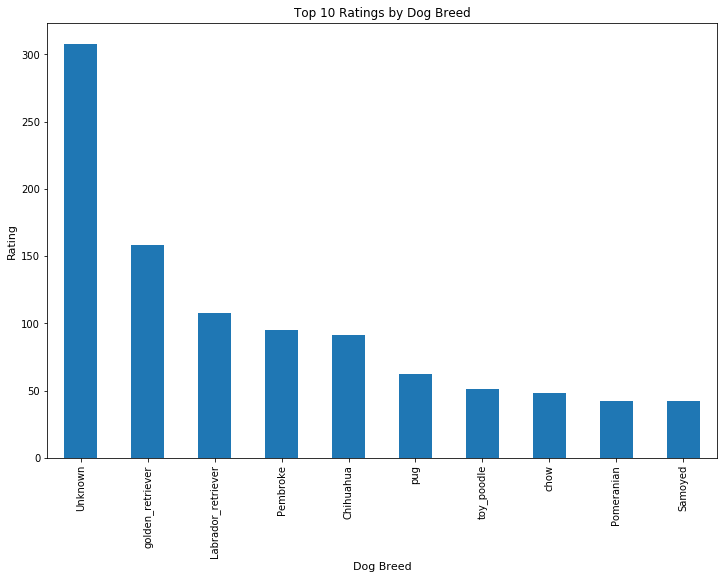

In [152]:
# Plotting the Top 10 Rated Dog-breed 

dogbreed_rating.plot(kind="bar",figsize=(12,8))
plt.title ('Top 10 Ratings by Dog Breed')
plt.xlabel('Dog Breed',fontsize=11)
plt.ylabel('Rating',fontsize=11);

In [153]:
twitter_archive_master.head(5)

tweet_id            timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo dog_class  \
0                  10   Phineas  None    None   None  None   unknown   
1                  10     Tilly  None    None   None  None   unknown   
2                  10    Archie  None    None   None  None   unknown   
3                  10     Darla  None    None   None  None   unknown   
4                  10  Franklin  None    None   None  None   unknown   

                                           jpg_url               breed  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg             Unknown   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg           Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  Labrador_retriever   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg              basset   

   confidence  retweet_count  favorite_count  
0    0.000000           8853           39467  
1    0.323581           6514           33819  
2    0.716012           4328           25461  
3    0.168086           8964           42908  
4    0.555712           9774           41048

In [154]:
dogbreed_=twitter_archive_master.groupby('breed')['breed'].count().sort_values(ascending=False).head(10)

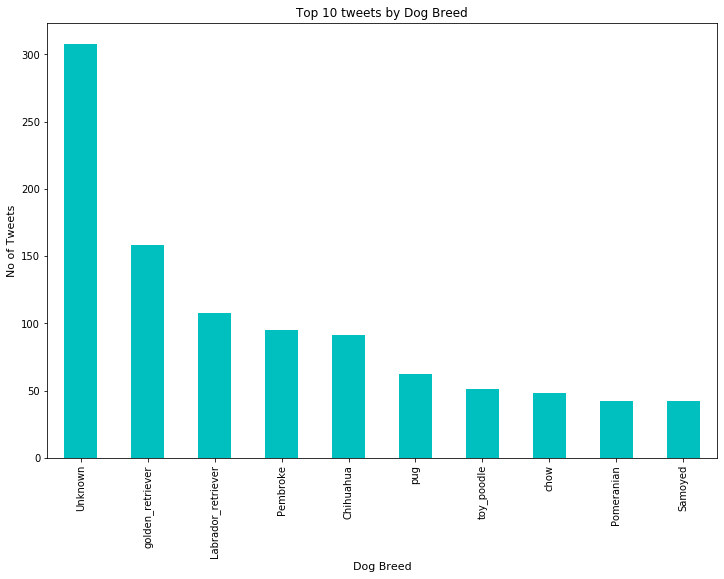

In [155]:
# Plotting the Top 10 tweeted Dog breed 

dogbreed_.plot(kind="bar",figsize=(12,8),color='c')
plt.title ('Top 10 tweets by Dog Breed')
plt.xlabel('Dog Breed',fontsize=11)
plt.ylabel('No of Tweets',fontsize=11);

In [156]:
twitter_archive_master.head(5)

tweet_id            timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo dog_class  \
0                  10   Phineas  None    None   None  None   unknown   
1                  10     Tilly  None    None   None  None   unknown   
2                  10    Archie  None    None   None  None   unknown   
3                  10     Darla  None    None   None  None   unknown   
4                  10  Franklin  None    None   None  None   unknown   

                                           jpg_url               breed  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg             Unknown   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg           Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  Labrador_retriever   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg              basset   

   confidence  retweet_count  favorite_count  
0    0.000000           8853           39467  
1    0.323581           6514           33819  
2    0.716012           4328           25461  
3    0.168086           8964           42908  
4    0.555712           9774           41048

In [159]:
dogbreed_likes=twitter_archive_master.groupby('name')['favorite_count'].mean().sort_values(ascending=False).head(10)

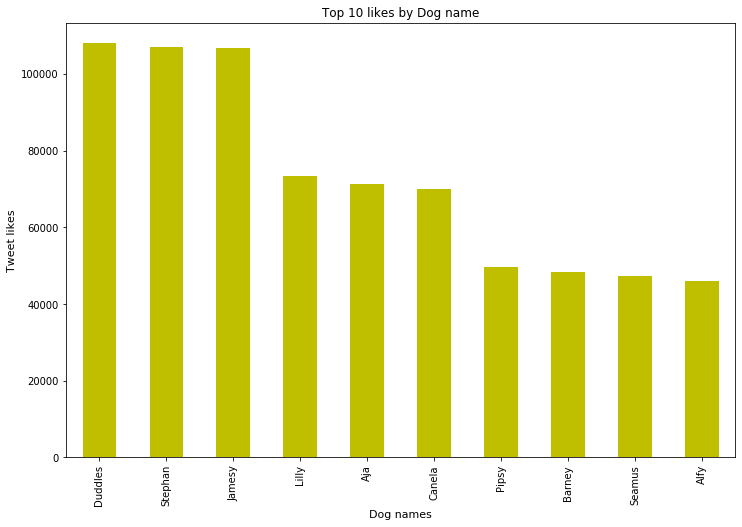

In [160]:
# Plotting the Top 10 liked dog names

dogbreed_likes.plot(kind="bar",figsize=(12,8),color='y')
plt.title ('Top 10 likes by Dog name')
plt.xlabel('Dog names',fontsize=11)
plt.ylabel('Tweet likes',fontsize=11);